In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
#Loading the dataset
data = pd.read_csv("C:\\Users\\bhimr\\OneDrive\\Documents\\SVM\\mushroom.csv")

In [3]:
data.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [5]:
data = data.drop(['Unnamed: 0'],axis = 1)

In [6]:
data.columns

Index(['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class',
       'stalk_height', 'cap_diameter'],
      dtype='object')

In [7]:
#LabelEncoding for categorical columns
for column in data.columns:
    if data[column].dtypes == 'object':
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])

In [8]:
data.head()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,4,2,7,0,1,1,2,0,7,1,...,0,0,2,6,3,1,5,1,14.276173,5.054983
1,4,0,6,0,1,3,1,1,3,0,...,1,0,2,6,1,2,5,0,3.952715,19.068319
2,3,1,5,1,4,1,1,0,8,1,...,1,3,2,6,6,0,5,1,9.054265,7.205884
3,0,2,4,1,3,3,0,0,6,0,...,0,3,2,0,4,1,0,1,5.226499,20.932692
4,3,3,8,1,5,2,1,1,6,0,...,1,2,0,4,8,1,4,1,14.037532,12.545245


In [9]:
data = data.drop_duplicates()

In [10]:
data.isnull().sum()

cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

In [11]:
correlation_matrix = data.corr()

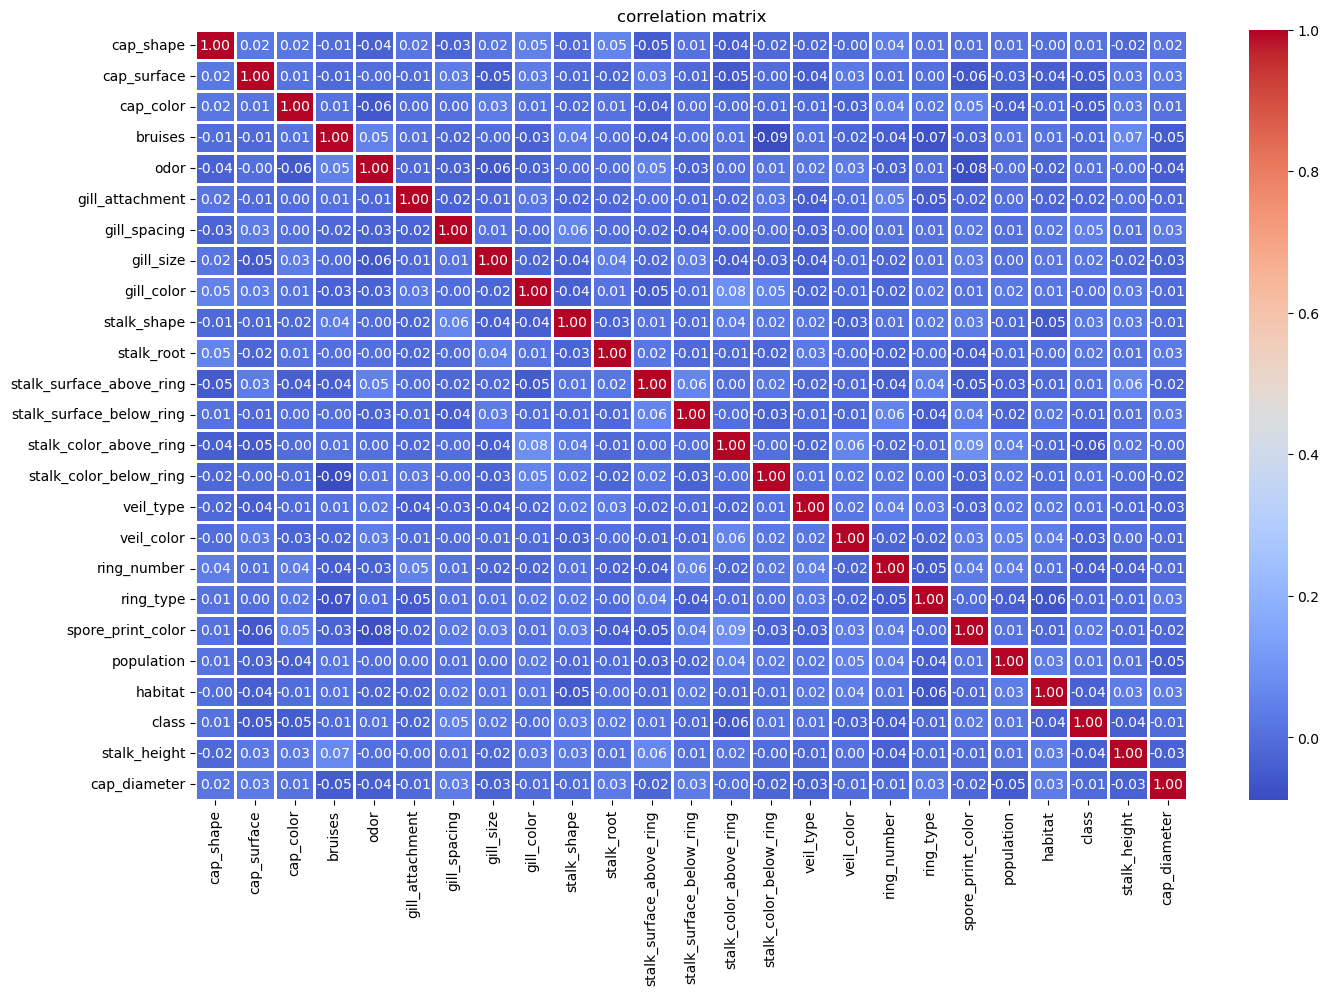

In [12]:
#Correlation Matrix plot
plt.figure(figsize=(16,10))
sns.heatmap(correlation_matrix,annot = True,cmap = 'coolwarm',fmt = ".2f",linewidths = 0.9)
plt.title("correlation matrix")
plt.show()

In [13]:
SPLitting into features and target columns
x = data.drop(['class'],axis = 1)
y = data['class']

C:\Users\bhimr\AppData\Local\Temp\ipykernel_18180\3235804609.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=class_df, x='Class', y='Count', palette="viridis")


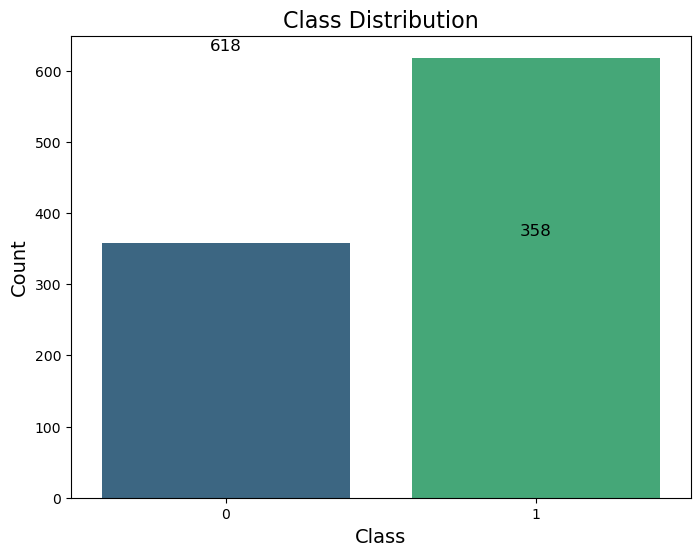

In [14]:
class_counts = data['class'].value_counts()

# Convert class_counts to a DataFrame for better compatibility with hue
class_df = pd.DataFrame({'Class': class_counts.index, 'Count': class_counts.values})

# Plot the class distribution
plt.figure(figsize=(8, 6))
sns.barplot(data=class_df, x='Class', y='Count', palette="viridis")
plt.title("Class Distribution", fontsize=16)
plt.xlabel("Class", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Annotate the counts on the bars
for i, count in enumerate(class_counts.values):
    plt.text(i, count + 10, str(count), ha='center', fontsize=12)

plt.show()

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [20]:
svm_model = SVC(kernel='linear', random_state=42)
# Train the model
svm_model.fit(x_train, y_train)
y_pred = svm_model.predict(x_test)

In [21]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6326530612244898

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        72
           1       0.63      1.00      0.78       124

    accuracy                           0.63       196
   macro avg       0.32      0.50      0.39       196
weighted avg       0.40      0.63      0.49       196


Confusion Matrix:
 [[  0  72]
 [  0 124]]


C:\Users\bhimr\OneDrive\Documents\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bhimr\OneDrive\Documents\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bhimr\OneDrive\Documents\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

In [27]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],                  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],     # Kernel type
    'gamma': ['scale', 'auto', 0.1, 0.01],  # Kernel coefficient
    'degree': [2, 3, 4]                     # Degree for 'poly' kernel
}


In [ ]:
# Initialize the SVM classifier
svm = SVC(random_state=42)
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
# Fit GridSearchCV
grid_search.fit(x_train, y_train)
# Display the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)


Fitting 5 folds for each of 144 candidates, totalling 720 fits


In [ ]:
pca = PCA(n_components=2)  # Reduce to 2 components for easy visualization
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

In [ ]:
# Initialize SVM classifiers with different kernels
kernels = ['linear', 'poly', 'rbf']
results = {}

for kernel in kernels:
    # Create and fit the SVM model with the current kernel
    svm = SVC(kernel=kernel, random_state=42)
    svm.fit(x_train_pca, y_train)
    
    # Make predictions on the testing set
    y_pred = svm.predict(x_test_pca)
    
    # Calculate accuracy and classification report
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    results[kernel] = {'accuracy': accuracy, 'report': report}
    
    # Display the accuracy for each kernel
    print(f"Kernel: {kernel}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}\n")